# Spatial Analysis Methodology

### 1. Ask questions: 
Formulate hypotheses and spatial
questions.

### 2. Explore the data: 
Examine the data quality,
completeness, and measurement limitations (scale
and resolution) to determine the level of analysis and
interpretation that can be supported.

### 3. Analyze and model: 
Break the problem down into
solvable components that can be modeled. Quantify
and evaluate the spatial questions.

### 4. Interpret the results: 
Evaluate and analyze the results
in the context of the question posed, data limitations,
accuracy, and other implications.

### 5. Repeat as necessary: 
Spatial analysis is a continuous
and iterative process that often leads to further
questions and refinements.

### 6. Present the results: 
The best information and
analysis becomes increasingly valuable when it can be
effectively presented and shared with a larger audience.

### 7. Make a decision: 

Spatial analysis and GIS are used to support the 
decision-making process. A successful spatial analysis 
process often leads to the understanding necessary to 
drive decisions and action.

# 1. Ask Questions

### Regarding Bridge Infrastructure

- Where in the country are the bridges in highest danger of causing safety issues?

- Which states have the worst conditions for bridges in the United States? 

- Which states have the best conditions for bridges in the United States?

- Where are the communities that are most reliant on bridges?

- Where are the communities that are most reliant on bridges that are deemed structurally deficient?

- Given frequency of use, relative economic and strategic importance, and potential consequences of failure on the transportation network, which bridges require the most immediate attention?

# 2. Explore Data

## Exploring Bridge Data (NBI)

Import needed modules

In [55]:
import pandas as pd
import arcgis
import arcpy
import os

Set workspace

In [7]:
workspace = r"C:\Users\albe9057\Documents\GitHub\Infrastructure_Analysis"

In [8]:
gis = arcgis.gis.GIS(url="https://ndirt.maps.arcgis.com", username="ANieto_ndirt")

Enter password: ········


#### Regarding Individual Bridge Conditions 

Set reference to downloaded NBI data

In [9]:
nbi_all = r"D:\ANieto_SolutionEngineer\Data\DOT\FHWA\NBI\2017allstatesallrecsdel\2017AllRecordsDelimitedAllStates.txt"
nbi_highways = r"D:\ANieto_SolutionEngineer\Data\DOT\FHWA\NBI\2017hwybronlyonefile\2017HwyBridgesDelimitedAllStates.txt"

In [10]:
nbi_all_df = pd.read_csv(nbi_all, encoding="ISO-8859-1")
nbi_all_df

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,2,5,7,17,31,36,37,38,39,41,44,61,63,66,67,68,69,70,71,73,75,76,77,79,86,87,88,96,98,102,106,107,108,109,113,114,119,120,121,123,124,130,131,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,69.5,0
3,1,000000883039900,1,4.0,1.0,00088,0.0,2,59.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,90.2,0
4,1,000001014002450,1,3.0,1.0,00101,0.0,2,79.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,49.9,2
5,1,000001331700710,1,6.0,2.0,00000,0.0,2,33.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,61.3,2
6,1,000002,1,4.0,1.0,00000,0.0,10,127.0,0.0,...,6800008,0.0,14.0,17.0,NaN,NaN,1,NaN,16.9,1
7,1,000004,1,4.0,1.0,00000,0.0,10,127.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,1
8,1,000004504800350,1,6.0,8.0,00000,0.0,1,95.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,72.8,0
9,1,000005,1,5.0,0.0,00000,0.0,10,75.0,48808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,22.1,1


In [11]:
nbi_highways_df = pd.read_csv(nbi_highways, encoding="ISO-8859-1")
nbi_highways_df

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,5,7,17,31,36,37,38,39,71,73,75,96,98,102,107,108,109,123,124) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,69.5,0
3,1,000000883039900,1,4.0,1.0,00088,0.0,2,59.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,90.2,0
4,1,000001014002450,1,3.0,1.0,00101,0.0,2,79.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,49.9,2
5,1,000001331700710,1,6.0,2.0,00000,0.0,2,33.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,61.3,2
6,1,000002,1,4.0,1.0,00000,0.0,10,127.0,0,...,6800008,0.0,14.0,17.0,NaN,NaN,1,NaN,16.9,1
7,1,000004,1,4.0,1.0,00000,0.0,10,127.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,1
8,1,000004504800350,1,6.0,8.0,00000,0.0,1,95.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,72.8,0
9,1,000005,1,5.0,0.0,00000,0.0,10,75.0,48808,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,22.1,1


In [12]:
for column in nbi_highways_df.columns:
    print(column)

STATE_CODE_001
STRUCTURE_NUMBER_008
RECORD_TYPE_005A
ROUTE_PREFIX_005B
SERVICE_LEVEL_005C
ROUTE_NUMBER_005D
DIRECTION_005E
HIGHWAY_DISTRICT_002
COUNTY_CODE_003
PLACE_CODE_004
FEATURES_DESC_006A
CRITICAL_FACILITY_006B
FACILITY_CARRIED_007
LOCATION_009
MIN_VERT_CLR_010
KILOPOINT_011
BASE_HWY_NETWORK_012
LRS_INV_ROUTE_013A
SUBROUTE_NO_013B
LAT_016
LONG_017
DETOUR_KILOS_019
TOLL_020
MAINTENANCE_021
OWNER_022
FUNCTIONAL_CLASS_026
YEAR_BUILT_027
TRAFFIC_LANES_ON_028A
TRAFFIC_LANES_UND_028B
ADT_029
YEAR_ADT_030
DESIGN_LOAD_031
APPR_WIDTH_MT_032
MEDIAN_CODE_033
DEGREES_SKEW_034
STRUCTURE_FLARED_035
RAILINGS_036A
TRANSITIONS_036B
APPR_RAIL_036C
APPR_RAIL_END_036D
HISTORY_037
NAVIGATION_038
NAV_VERT_CLR_MT_039
NAV_HORR_CLR_MT_040
OPEN_CLOSED_POSTED_041
SERVICE_ON_042A
SERVICE_UND_042B
STRUCTURE_KIND_043A
STRUCTURE_TYPE_043B
APPR_KIND_044A
APPR_TYPE_044B
MAIN_UNIT_SPANS_045
APPR_SPANS_046
HORR_CLR_MT_047
MAX_SPAN_LEN_MT_048
STRUCTURE_LEN_MT_049
LEFT_CURB_MT_050A
RIGHT_CURB_MT_050B
ROADWAY_WIDTH_M

In [13]:
nbi_highways_df['LONG_017'].head()

0    87341340.0
1    87340890.0
2    84583800.0
3    87581200.0
4    87225400.0
Name: LONG_017, dtype: float64

Set reference to published DCMDVA Deficient Bridges Service

<Item title:"DCVAMD_CBSA_DeficientBridges" type:Feature Layer Collection owner:ANieto_ndirt>
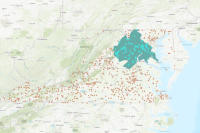

<Item title:"Test_Impaired_Route" type:Feature Layer Collection owner:ANieto_ndirt>
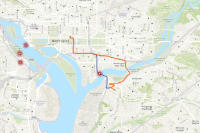

<Item title:"DCVAMD_DeficientBridges" type:Feature Layer Collection owner:ANieto_ndirt>
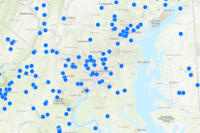

<Item title:"Test_Normal_Route" type:Feature Layer Collection owner:ANieto_ndirt>
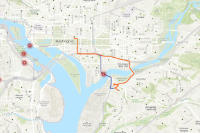

In [14]:
bridge_analysis_items = gis.content.search("Bridges", item_type="Feature Service")
for item in bridge_analysis_items:
    display(item)

<Item title:"DCVAMD_CBSA_DeficientBridges" type:Feature Layer Collection owner:ANieto_ndirt>
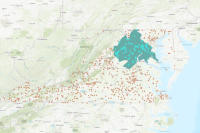

In [15]:
bridges_item = gis.content.search("CBSA Bridges", item_type="Feature Service")[0]
bridges_item

### Explore DCVAMD CBSA NBI data on a map

In [16]:
highway_bridges_map = gis.map("Washington DC", zoomlevel=8)
highway_bridges_map

In [17]:
highway_bridges_map.add_layer(bridges_item)

### Explore Tract Centroids

<Item title:"DCVAMD_CBSA_Tracts_Centroids_Work" type:Feature Layer Collection owner:ANieto_ndirt>
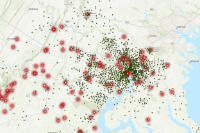

<Item title:"DCVAMD_CBSA_Tracts_Centroids" type:Feature Layer Collection owner:ANieto_ndirt>
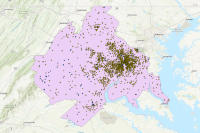

<Item title:"DCVAMD_CBSA_Tracts_Centroids_Residence" type:Feature Layer Collection owner:ANieto_ndirt>
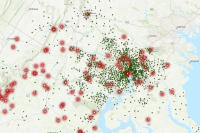

<Item title:"DCVAMD_CBSA_Tracts_Polygons" type:Feature Layer Collection owner:ANieto_ndirt>
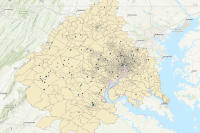

In [18]:
tract_items = gis.content.search("Tracts", item_type="feature service")
for item in tract_items:
    display(item)

<Item title:"DCVAMD_CBSA_Tracts_Centroids_Work" type:Feature Layer Collection owner:ANieto_ndirt>
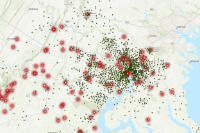

In [19]:
tract_centroids_item = tract_items[0]
tract_centroids_item

In [20]:
highway_bridges_map.add_layer(tract_centroids_item)

### Explore Journey to Work Commuting Tract Data

<Item title:"DCVAMD_CBSA_Tracts_Centroids_Work" type:Feature Layer Collection owner:ANieto_ndirt>
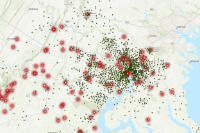

<Item title:"DCVAMD_CBSA_Tracts_Centroids_Residence" type:Feature Layer Collection owner:ANieto_ndirt>
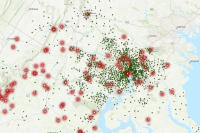

In [47]:
jtw_layers = gis.content.search("Journey to Work", item_type="feature service")
for item in jtw_layers:
    display(item)

In [51]:
work_tracts_item = jtw_layers[0]
residence_tracts_item = jtw_layers[1]

In [52]:
jtw_map = gis.map("Washington DC", zoomlevel=8)
jtw_map

In [53]:
jtw_map.add_layer([work_tracts_item])

### Selected Question for Analysis

- Given each bridge's frequency of use, current state, relative economic and strategic importance, and potential consequences of failure on the transportation network, which bridges require the most immediate attention?

# 3. Analyze and Model

#### Previous Bridge Infrastructure Prioritization

<img src="img/PrioritizationModel.png">

#### Proposed Changes

- Incorporate the relative importance of the bridge's geography into considerations for how important the bridge is. 
- Consider the alternative options to the people that use the bridge.
- In a similar fashion to our analysis of healthcare provider network loss impacts, determine and quantify changes to commuting patterns caused by the loss of each bridge.

#### Process Outline

Proposed Process

- Run Full ODCM from tracts to tracts (If it takes too long, switch to congressional districts)

- Bring "nominal commute impedance" to the commute JTW table

- For each bridge, 

    - repeat ODCM from tracts to tracts.
    
    - Bring "impaired commute impedance" to the commute JTW table

    - Compare the bridge's "impaired commute impedance" to the "nominal commute impedance" and find diff
    
    - For each diff delta record, 
        
        - Calculate the impedance difference
        
        - Calculate an impact assessment: impedance delta * the amount of people taking the impaired route * manual index
        
    - Add up the total impact assessment for the bridge.


In [4]:
arcgis.network.analysis.generate_origin_destination_cost_matrix?

In [ ]:
arcgis.network.analysis.generate_origin_destination_cost_matrix()

##### Test Run on Single Bridge (Arcpy-driven)

Helper Functions

In [49]:
def ArcGISVersionChecker():
    """
    Determines the version of ArcGIS Desktop that the user has installed and returns outputs based on the input
    parameter
    :args:
    :return:
    desktop_version (string) - String corresponding to the full version of ArcGIS Desktop
    guid_folder (string) - String corresponding to the installation GUID key
    program_files_folder (string) - String corresponding to the program files folder based on the version
    """
    installer_folder = r"C:\Windows\Installer"  # Establishes a path to the default Windows installer folder

    # Establishes a version dictionary containing the guid values and program files folder corresponding to each
    # version of ArcGIS Desktop
    # Note - find guid at:
    # HKEY_LOCAL_MACHINE > SOFTWARE > Wow6432Node > Esri > Desktop<ver> >> ProductCode key
    arcgis_version_dictionary = {
        "ArcGIS_10.5.1": {"guid": "{4740FC57-60FE-45BB-B513-3309F6B73183}", "program_files_folder": "Desktop10.5"},
        "ArcGIS_10.5": {"guid": "{76B58799-3448-4DE4-BA71-0FDFAA2A2E9A}", "program_files_folder": "Desktop10.5"},
        "ArcGIS_10.4": {"guid": "{72E7DF0D-FFEE-43CE-A5FA-43DFC25DC087}", "program_files_folder": "Desktop10.4"},
        "ArcGIS_10.3.1": {"guid": "{831DD630-F230-49C6-AD41-312E8E0F9CEE}", "program_files_folder": "Desktop10.3"},
        "ArcGIS_10.3": {"guid": "{9A0BC33A-EAA8-4ED4-8D0C-CB9B42B06D7F}", "program_files_folder": "Desktop10.3"},
        "ArcGIS_10.2.2": {"guid": "{761CB033-D425-4A16-954D-EA8DEF4D053B}", "program_files_folder": "Desktop10.2"},
        "ArcGIS_10.2.1": {"guid": "{8777990C-4F53-4782-9A38-E60343B5053D}", "program_files_folder": "Desktop10.2"},
        "ArcGIS_10.2": {"guid": "{44EF0455-5764-4158-90B3-CA483BCB1F75}", "program_files_folder": "Desktop10.2"},
        "ArcGIS_10.1": {"guid": "{6C8365F4-1102-4064-B696-68842D20B933}", "program_files_folder": "Desktop10.1"}
    }

    """ Main iteration """
    # Iterate on each key in the arcgis_version_dictionary
    for version in arcgis_version_dictionary:
        # Create the installer_path variable by linking it to the installer_folder string
        installer_path = str(installer_folder) + "\\" + str(arcgis_version_dictionary[version]["guid"])

        # Perform verification to determine if the installer_path exists
        if arcpy.Exists(installer_path):
            # Designate the desktop_version variable for output
            desktop_version = str(version)
            # Designate the guid_folder folder for output
            guid_folder = arcgis_version_dictionary[version]["guid"]
            # Designate the program_files_folder variable for output
            program_files_folder = arcgis_version_dictionary[version]["program_files_folder"]

            # Break iteration upon the first installation folder found in sequence from newest to oldest
            break

        else:
            desktop_version = None
            guid_folder = None
            program_files_folder = None

    return desktop_version, guid_folder, program_files_folder

In [65]:
# Without arcpy.mapping
def create_odcm(gdb,
                origins_fc,
                origins_id_field,
                origins_name_field,
                destinations_fc,
                destinations_id_field,
                destinations_name_field,
                polybarrier_fc,
                polybarrier_id_field,
                polybarrier_name_field,
                odcm_name,
                network_dataset,
                impedance_value,
                impedance_attribute,
                accumulate_attribute_name,
                impedance_attribute_field_name="Dij",
                use_lines=False,
                out_na_layer_name="Origins2Destinations",
                validate_inputs=False,
                method_message="\t\tcreate_odcm: ",
                output_origin_id_field_name='origin_id',
                output_origin_name_field_name='origin_name',
                output_dest_id_field_name='destination_id',
                output_dest_name_field_name='destination_name',
                logger_object=None):
    """
    create_odcm: Creates an origin-destination cost matrix
    """
    
    import os

    # Set standardized method messaging title

    print("{0}Initializing Origin-Destination Cost Matrix process...".format(method_message))

    # Establish workspace parameters
    workspace = gdb
    arcpy.env.workspace = workspace
    arcpy.env.overwriteOutput = True

    # Determine which version of arcgis desktop is being used
    DesktopVersion = ArcGISVersionChecker()[2]

    lines_param = "STRAIGHT_LINES" if use_lines else "NO_LINES"
    print("DEVNOTE: lines_param={0}".format(lines_param))

    print("{0}Acquiring Network Analyst extension...".format(method_message))
    # Acquire Network Analyst extension
    if arcpy.CheckExtension("Network") != "Available":
        # Raise a custom exception
        ##            raise LicenseError
        print("{0}ERROR: A Network Analyst License is required in order to create the ODCM; the ODCM will not be produced. Please consult with the GIS Developer if a license is expected to be available...".format(method_message))
        raise ValueError("Unable to acquire a network analyst license!")

    elif arcpy.CheckExtension("Network") == "Available":
        arcpy.CheckOutExtension("Network")

        if validate_inputs:
            # Perform verification of origins and destinations feature classes
            print("{0}Acquiring Origins...".format(method_message))
            if arcpy.Exists(origins_fc):
                pass
            else:
                print("Unable to run create_odcm with provided origins!")
                raise ValueError("Unable to run create_odcm with provided origins!")
            print("{0}Acquiring Destinations...".format(method_message))
            if arcpy.Exists(destinations_fc):
                pass
            else:
                print("Unable to run create_odcm with provided destinations!")
                raise ValueError("Unable to run create_odcm with provided destinations!")

        print("{0}Establishing Network Analyst Layer...".format(method_message))
        outlayerfile = out_na_layer_name + ".lyr"

        print("{0}The established impedance attribute is: {1}".format(method_message, str(impedance_attribute)))
        # Create variable that refers to the Impedance Attribute Field from the default ODCM Table
        impedance_attribute_field = "Total_" + impedance_attribute

        print("{0}Establishing Destination Search Distance Cut-Off...".format(method_message))
        # Import user parameter 'Impedance Cutoff'

        print("{0}Impedance Cutoff: {1}".format(method_message, str(impedance_value)))
        # Create the Composite Origin-Destination Cost Matrix Network Analysis Layer.

        print("{0}Creating Origin-Destination Cost Matrix...".format(method_message))
        out_na_layer = arcpy.MakeODCostMatrixLayer_na(network_dataset,
                                                      out_na_layer_name,
                                                      impedance_attribute,
                                                      impedance_value, "", "", "", "",
                                                      "USE_HIERARCHY", "",
                                                      lines_param).getOutput(0)
        
#         out_na_layer = arcpy.MakeODCostMatrixLayer_na(in_network_dataset=network_dataset, 
#                                                       out_network_analysis_layer=out_na_layer_name, 
#                                                       impedance_attribute=impedance_attribute, 
#                                                       default_cutoff=impedance_value, 
#                                                       default_number_destinations_to_find=None, 
#                                                       accumulate_attribute_name=accumulate_attribute_name, 
#                                                       UTurn_policy=None, 
#                                                       restriction_attribute_name=None, 
#                                                       hierarchy=None, 
#                                                       hierarchy_settings=None, 
#                                                       output_path_shape=None, 
#                                                       time_of_day=None).getOutput(0)        

        # Acquire the SubLayers from the Composite Origin-Destination Cost Matrix Network Analysis Layer
        print("{0}Acquiring Composite Network Analysis SubLayers...".format(method_message))
        sublayer_names = arcpy.na.GetNAClassNames(out_na_layer)
        
        # Acquire the Origin's SubLayer
        print("{0}Acquiring Origins SubLayer...".format(method_message))
        origins_layername = sublayer_names["Origins"]
        origins_fieldmap = arcpy.na.NAClassFieldMappings(out_na_layer, origins_layername)
        origins_fieldmap["Name"].mappedFieldName = origins_id_field
        # Load the Origins into the Composite Network Analysis Layer.
        print("{0}Loading Origins into Composite Network Analysis Layer...".format(method_message))
        arcpy.na.AddLocations(out_na_layer, origins_layername, origins_fc, origins_fieldmap)
        
        # Acquire the Destinations SubLayer.
        print("{0}Acquiring Destinations SubLayer...".format(method_message))
        destinations_layername = sublayer_names["Destinations"]
        destinations_fieldmap = arcpy.na.NAClassFieldMappings(out_na_layer, destinations_layername)
        destinations_fieldmap["Name"].mappedFieldName = destinations_id_field
        # Load the Destinations into the Composite Network Analysis Layer.
        print("{0}Loading Destinations into Composite Network Analysis Layer...".format(method_message))
        arcpy.na.AddLocations(out_na_layer, destinations_layername, destinations_fc, destinations_fieldmap)
        
#         # Acquire the Barriers SubLayer
#         print("{0}Acquiring Polygon Barriers SubLayer...".format(method_message))
#         polybarriers_layername = sublayer_names["Polygon Barriers"]
#         # Create a Field Map object to map the 'proForma' DIDs to the Destinations field of the Origin-Destination Cost Matrix.
#         polybarriers_fieldmap = arcpy.na.NAClassFieldMappings(out_na_layer, polybarriers_layername)
#         polybarriers_fieldmap["Name"].mappedFieldName = polybarrier_id_field
#         # Load the Destinations into the Composite Network Analysis Layer.
#         print("{0}Loading Polygonal Barriers into Composite Network Analysis Layer...".format(method_message))
#         arcpy.na.AddLocations(out_na_layer, polybarriers_layername, polybarriers_fc, polybarriers_fieldmap)
        
        # Solve the Network
        print("{0}Solving Network 'Origins2Destinations' Origin-Destination Cost Matrix...".format(method_message))
        arcpy.na.Solve(out_na_layer)
        
        #Get sublayers
        #listLayers returns a list of sublayer layer objects contained in the NA
        #group layer, filtered by layer name used as a wildcard. Use the sublayer
        #name from GetNAClassNames as the wildcard string in case the sublayers
        #have non-default names.
        origins_sublayer = out_na_layer.listLayers(origins_layername)[0]
        destinations_sublayer = out_na_layer.listLayers(destinations_layername)[0]
        lines_sublayer = out_na_layer.listLayers(sublayer_names["ODLines"])[0]

        #Use the JoinField tool to transfer OD Cost Matrix information to the
        #output feature class
        #Transfer the tract ID from the input Origins to the output Lines
        arcpy.management.JoinField(lines_sublayer, "OriginID",
                                        origins_sublayer, "ObjectID", origins_name_field)
        #Transfer the hospital name from the input Destinations to the output Lines
        arcpy.management.JoinField(lines_sublayer, "DestinationID",
                                destinations_sublayer, "ObjectID", dest_name_field)
        print("Script completed successfully")

        arcpy.CheckInExtension("Network")
        return lines_sublayer

In [66]:
def convert_gis_table_to_pddataframe(gis_table, fields_list=["*"], remove_index=False):
    """
    Converts a gis table in a file geodatabase to a pandas dataframe.
    :param gis_table: Input feature class
    :param fields_list: Optional parameter - defaults to wildcard ["*"]. Optionally include specific fields.
    :param remove_index: Optional parameter - defaults to False. Remove index from output dataframe.
    :return: Pandas dataframe of the feature class WITHOUT geometry and date attributes.
    """
    # Gather a list of all field names if the user did not specify field inputs
    if fields_list == ["*"]:
        fields_list = [field_object.name for field_object in arcpy.ListFields(gis_table) if field_object.type not in ["Geometry", "Date"]]

    temp_array = arcpy.da.TableToNumPyArray(gis_table, fields_list)
    df = pd.DataFrame(data=temp_array)
    if remove_index:
        df.reset_index(inplace=True)
    return df

In [ ]:
# Set workspace
workspace_gdb = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\BridgeCriticality_Arcpy_Workspace.gdb"

# Set Arcpy environment
arcpy.env.workspace = workspace_gdb
arcpy.env.overwriteOutput = True

# Set reference to origins
origin_tracts = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_Tracts_Centroids"
origins_id_field = "ID"
origins_name_field = "NAME"

# Set reference to destinations
dest_tracts = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_Tracts_Centroids"
dest_id_field = "ID"
dest_name_field = "NAME"

# Set reference to bridges
bridges_fc = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_DeficientBridges"
bridge_polybarriers_fc = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_DeficientBridges_Polybarriers"
                polybarrier_fc,
                polybarrier_id_field,
                polybarrier_name_field,

# Set reference to the network dataset
network_dataset = "C:\\ArcGIS\\Business Analyst\\US_2015\\Data\\Streets Data\\NAVTEQ_2014_Q3_NA.gdb\\Routing\\Routing_ND"

# Set reference to commute table
commute_table = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\ctpp_journey_to_work"

# Set reference to impedance values needed for odcm
impedance_value=99999
impedance_attribute="Minutes"
accumulate_attributes = ["Minutes", "Meters", "Miles"]

In [ ]:
# Run nominal ODCM using tracts to tracts
# Create an odcm table for each patient to each doctor - retrieve top two for each patient
odcm = create_odcm(workspace_gdb,
                    origin_tracts,
                    origins_id_field,
                    origins_name_field,
                    dest_tracts,
                    dest_id_field,
                    dest_name_field,
                    "first_test",
                    network_dataset,
                    impedance_value,
                    impedance_attribute,
                    impedance_attribute_field_name="Dij",
                    use_lines=False,
                    out_na_layer_name="Origins2Destinations",
                    validate_inputs=False,
                    method_message="create_odcm: ",
                    output_origin_id_field_name='origin_id',
                    output_origin_name_field_name='origin_name',
                    output_dest_id_field_name='destination_id',
                    output_dest_name_field_name='destination_name',
                    logger_object=None)

# Convert the odcm gis table to a pandas dataframe
odcm_df = convert_gis_table_to_pddataframe(odcm)
odcm_df.head()

create_odcm: Initializing Origin-Destination Cost Matrix process...
DEVNOTE: lines_param=NO_LINES
create_odcm: Acquiring Network Analyst extension...
create_odcm: Establishing Network Analyst Layer...
create_odcm: The established impedance attribute is: Minutes
create_odcm: Establishing Destination Search Distance Cut-Off...
create_odcm: Impedance Cutoff: 99999
create_odcm: Creating Origin-Destination Cost Matrix...
create_odcm: Acquiring Composite Network Analysis SubLayers...
create_odcm: Acquiring Origins SubLayer...
create_odcm: Loading Origins into Composite Network Analysis Layer...
create_odcm: Acquiring Destinations SubLayer...
create_odcm: Loading Destinations into Composite Network Analysis Layer...
create_odcm: Solving Network 'Origins2Destinations' Origin-Destination Cost Matrix...


In [25]:
# Run impaired ODCM using tracts to tracts, using a bridge feature as a polygon barrier


In [ ]:
# Join nominal and impaired ODCM dataframes


In [36]:
# Bring the commute table as a dataframe


In [ ]:
# Join nominal+impaired ODCM dataframe to commute dataframe (left join; remove anything not found in commute)


In [ ]:
# Identify deltas in impedance


In [26]:
# Calculate count and impedance sum in deltas


In [27]:
# Record impedance delta sum, impedance delta average (impedance sum / delta count), and delta count for the bridge's record


In [ ]:
# Multiply each bridge's impedance delta sum by a configurable factor to determine criticality score


In [28]:
# Stack rank all bridges based on criticality score


In [29]:
# Show top five


In [31]:
# Show bottom five


##### Full Sequence (Arcpy-driven)

In [ ]:
- Run Full ODCM from tracts to tracts (If it takes too long, switch to congressional districts)

- Bring "nominal commute impedance" to the commute JTW table

- For each bridge, 

    - repeat ODCM from tracts to tracts.
    
    - Bring "impaired commute impedance" to the commute JTW table

    - Compare the bridge's "impaired commute impedance" to the "nominal commute impedance" and find diff
    
    - For each diff delta record, 
        
        - Calculate the impedance difference
        
        - Calculate an impact assessment: impedance delta * the amount of people taking the impaired route * manual index
        
    - Add up the total impact assessment for the bridge.

##### Full Sequence (Python API driven)

# 4. Interpret the Results

# 5. Repeat as Necessary

# 6. Present the Results

# 7. Make a Decision